In [ ]:
pip install wget


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0361bcbb2c3f4d72d8c12d47fdd49bce3f1272572486347b95f7d890eef56837
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
import wget

In [ ]:
filename =wget.download(url)

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(filename)

for layer in pre_trained_model.layers:
      layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (2, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
cd /content/drive/My Drive/dataset1

/content/drive/My Drive/dataset1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_path = r'/content/drive/My Drive/dataset1'

train_dir = os.path.join(root_path, 'train')
validation_dir = os.path.join(root_path, 'validation')

train_fat_dir = os.path.join(train_dir, 'fatigue')  # directory with our training fat pictures
train_nofat_dir = os.path.join(train_dir, 'non fatigue')  # directory with our training nofat pictures
validation_fat_dir = os.path.join(validation_dir, 'fatigue')  # directory with our validation fat pictures
validation_nofat_dir = os.path.join(validation_dir, 'non fatigue')  # directory with our validation nofat pictures

num_fat_tr = len(os.listdir(train_fat_dir))
num_nofat_tr = len(os.listdir(train_nofat_dir))

num_fat_val = len(os.listdir(validation_fat_dir))
num_nofat_val = len(os.listdir(validation_nofat_dir))

total_train = num_fat_tr + num_nofat_tr
total_val = num_fat_val + num_nofat_val

print('total training fat images:', num_fat_tr)
print('total training nofat images:', num_nofat_tr)

print('total validation fat images:', num_fat_val)
print('total validation nofat images:', num_nofat_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_image_generator.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                     
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_image_generator.flow_from_directory( validation_dir,
                                                          batch_size  = 128,
                                                
                                                          target_size = (150, 150))

total training fat images: 3705
total training nofat images: 9187
total validation fat images: 718
total validation nofat images: 2162
--
Total training images: 12892
Total validation images: 2880
Found 12892 images belonging to 2 classes.
Found 2880 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = total_train // 128,
            epochs = 20,
            validation_steps = total_val // 128)

Epoch 1/20
100/100 [==============================] - 5309s 53s/step - loss: 0.2806 - accuracy: 0.9065 - val_loss: 0.2750 - val_accuracy: 0.8906
Epoch 2/20
100/100 [==============================] - 597s 6s/step - loss: 0.0834 - accuracy: 0.9699 - val_loss: 1.0738 - val_accuracy: 0.7660
Epoch 3/20
100/100 [==============================] - 611s 6s/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.2867 - val_accuracy: 0.8825
Epoch 4/20
100/100 [==============================] - 609s 6s/step - loss: 0.0422 - accuracy: 0.9857 - val_loss: 0.2519 - val_accuracy: 0.9009
Epoch 5/20
100/100 [==============================] - 611s 6s/step - loss: 0.0351 - accuracy: 0.9875 - val_loss: 0.3858 - val_accuracy: 0.8540
Epoch 6/20
100/100 [==============================] - 608s 6s/step - loss: 0.0283 - accuracy: 0.9900 - val_loss: 0.2718 - val_accuracy: 0.9041
Epoch 7/20
100/100 [==============================] - 600s 6s/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.3143 - val_accuracy: 0.88

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = total_train // 128,
            epochs = 20,
            validation_steps = total_val // 128)

Epoch 1/20
100/100 [==============================] - 5182s 52s/step - loss: 0.3020 - accuracy: 0.9041 - val_loss: 0.3511 - val_accuracy: 0.8445
Epoch 2/20
100/100 [==============================] - 626s 6s/step - loss: 0.0901 - accuracy: 0.9685 - val_loss: 0.3183 - val_accuracy: 0.8793
Epoch 3/20
100/100 [==============================] - 622s 6s/step - loss: 0.0616 - accuracy: 0.9792 - val_loss: 0.2897 - val_accuracy: 0.8910
Epoch 4/20
100/100 [==============================] - 628s 6s/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.6386 - val_accuracy: 0.7688
Epoch 5/20
100/100 [==============================] - 620s 6s/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.2939 - val_accuracy: 0.8991
Epoch 6/20
100/100 [==============================] - 618s 6s/step - loss: 0.0274 - accuracy: 0.9901 - val_loss: 0.3234 - val_accuracy: 0.8938
Epoch 7/20
100/100 [==============================] - 619s 6s/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 2.1224 - val_accuracy: 0.56

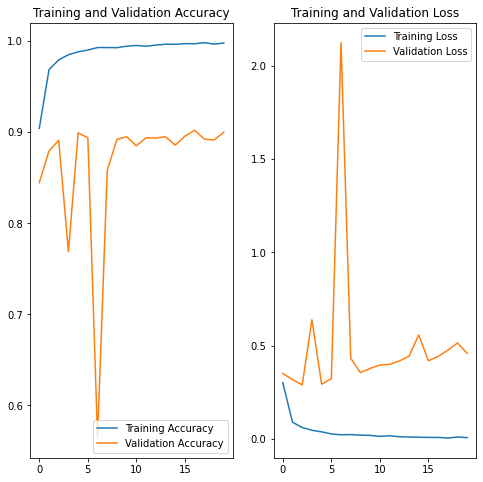

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
epochs =20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/saved_model/modeltranslearning.h5')

In [ ]:

preds=model.predict("/content/drive/My Drive/dataset1/validation/fatigue/0 00580.jpg")

IndexError: ignored